In [1]:
import sklearn

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('dataset/Bank_Personal_Loan_Modelling.csv')

df = df.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis=1)

In [3]:
df.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1,0,1,0,0,0
1,45,34,3,1,0,1,0,0,0
2,39,11,1,1,0,0,0,0,0
3,35,100,1,2,0,0,0,0,0
4,35,45,4,2,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: int64(9)
memory usage: 351.7 KB


In [5]:
df.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


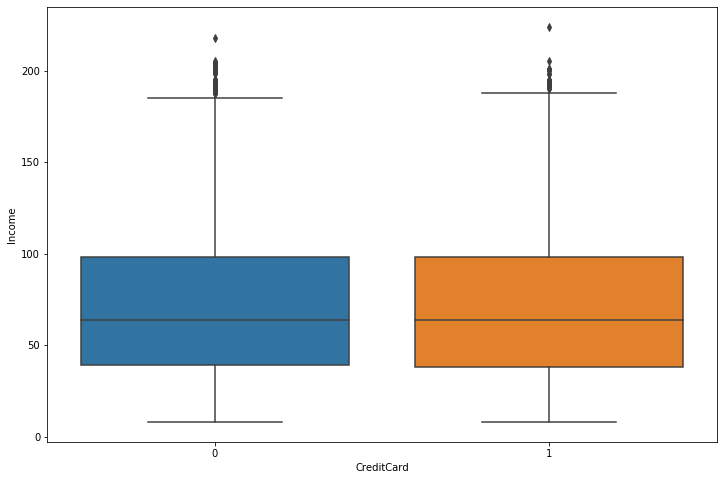

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(df['CreditCard'], df['Income'])
plt.show()

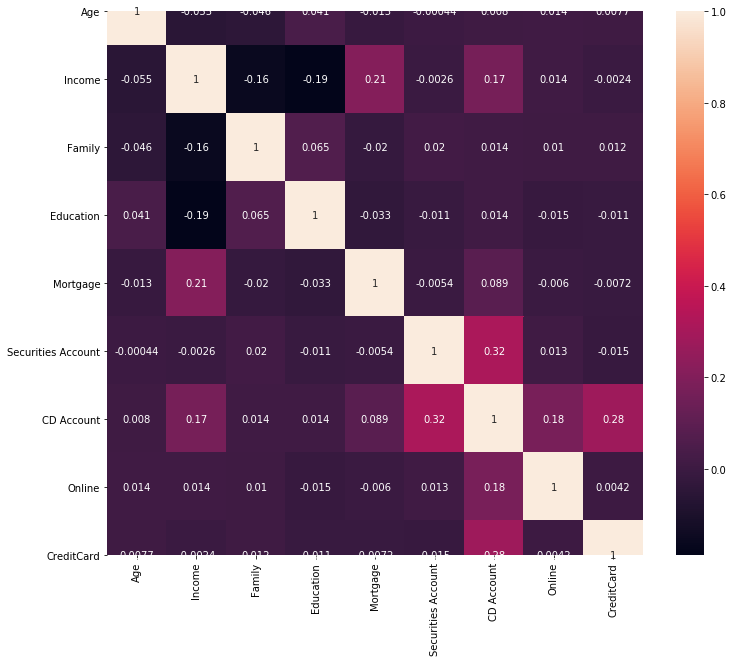

In [7]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_corr, annot=True)
plt.show()

In [8]:
X = df.drop('CreditCard', axis=1)
Y = df['CreditCard']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

log_clf = LogisticRegression(C=1, solver='liblinear')

svc_clf = SVC(C=1, kernel='linear', gamma='auto') #linearly seperable

naive_clf = GaussianNB()

### hard voting

In [9]:
for clf in (log_clf, svc_clf, naive_clf):
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.739
SVC 0.739
GaussianNB 0.739


In [10]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf),
                                               ('svc', svc_clf),
                                               ('naive', naive_clf)],
                                  voting='hard')

In [11]:
voting_clf_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None, var_smoothing=1e-09))]

In [12]:
voting_clf_hard.named_estimators

{'lr': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'svc': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'naive': GaussianNB(priors=None, var_smoothing=1e-09)}

In [13]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto', kernel='linear',
                          

In [14]:
y_pred = voting_clf_hard.predict(x_test)

In [15]:
accuracy_score(y_test, y_pred)

0.739

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       711
           1       0.73      0.16      0.26       289

    accuracy                           0.74      1000
   macro avg       0.73      0.57      0.55      1000
weighted avg       0.74      0.74      0.67      1000



In [17]:
print(confusion_matrix(y_test, y_pred))

[[694  17]
 [244  45]]


In [18]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.739
SVC 0.739
GaussianNB 0.739
VotingClassifier 0.739


### soft voting

In [19]:
y_pred_probs = log_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.67579921, 0.32420079],
       [0.69931236, 0.30068764],
       [0.72709647, 0.27290353],
       [0.66375123, 0.33624877],
       [0.68136098, 0.31863902],
       [0.65724535, 0.34275465],
       [0.78753848, 0.21246152],
       [0.69630551, 0.30369449],
       [0.87491132, 0.12508868],
       [0.85226717, 0.14773283]])

In [20]:
y_pred_probs = naive_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.87914792, 0.12085208],
       [0.8726094 , 0.1273906 ],
       [0.89040766, 0.10959234],
       [0.87833344, 0.12166656],
       [0.88781472, 0.11218528],
       [0.87014464, 0.12985536],
       [0.88243265, 0.11756735],
       [0.86813687, 0.13186313],
       [0.91712375, 0.08287625],
       [0.91898285, 0.08101715]])

In [21]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [22]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf),
                                               ('svc', svc_clf_soft),
                                               ('naive', naive_clf)],
                                  voting='soft',
                                  weights=[0.4, 0.3, 0.3])

In [23]:
for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.739
SVC 0.739
GaussianNB 0.739
VotingClassifier 0.739
